In [1]:
# Import necessary libraries
import pandas as pd

# Import necessary libraries for visualization
import matplotlib.pyplot as plt

In [2]:
# Load the augmented dataset
df_augmented = pd.read_csv('data/new-changedData/google-play-rev-gen-2-TF_IDF-enhanced.csv')

# Separate the dataset into positive and negative reviews based on the 'rating_label'
positive_data_augmented = df_augmented[df_augmented['rating_label'] == 'positive']
negative_data_augmented = df_augmented[df_augmented['rating_label'] == 'negative']

# Remove non-TF-IDF columns to focus on the TF-IDF features
positive_data_tfidf = positive_data_augmented.drop(columns=['rating_label', 'review_length', 'sentiment_score'])
negative_data_tfidf = negative_data_augmented.drop(columns=['rating_label', 'review_length', 'sentiment_score'])

# Get the sum of TF-IDF scores for each word in positive and negative reviews
positive_tfidf_scores = positive_data_tfidf.sum(axis=0)
negative_tfidf_scores = negative_data_tfidf.sum(axis=0)

# Sort the words by their sum of TF-IDF scores to identify the most important words
positive_top_words = positive_tfidf_scores.sort_values(ascending=False).head(10)
negative_top_words = negative_tfidf_scores.sort_values(ascending=False).head(10)

# Display the top words in both positive and negative reviews
print("Top Positive Words (TF-IDF):")
print(positive_top_words)

print("\nTop Negative Words (TF-IDF):")
print(negative_top_words)


Top Positive Words (TF-IDF):
like       15.035995
story      14.274265
good       14.019543
love       13.486859
quest      12.354796
amazing    11.585689
fun        10.130115
great       9.763984
design      9.221690
graphic     9.215851
dtype: float64

Top Negative Words (TF-IDF):
dialogue    7.919173
time        7.305214
skip        6.984717
update      6.870209
problem     5.671096
story       5.346082
like        5.334033
end         5.321469
fix         5.309571
low         5.279550
dtype: float64


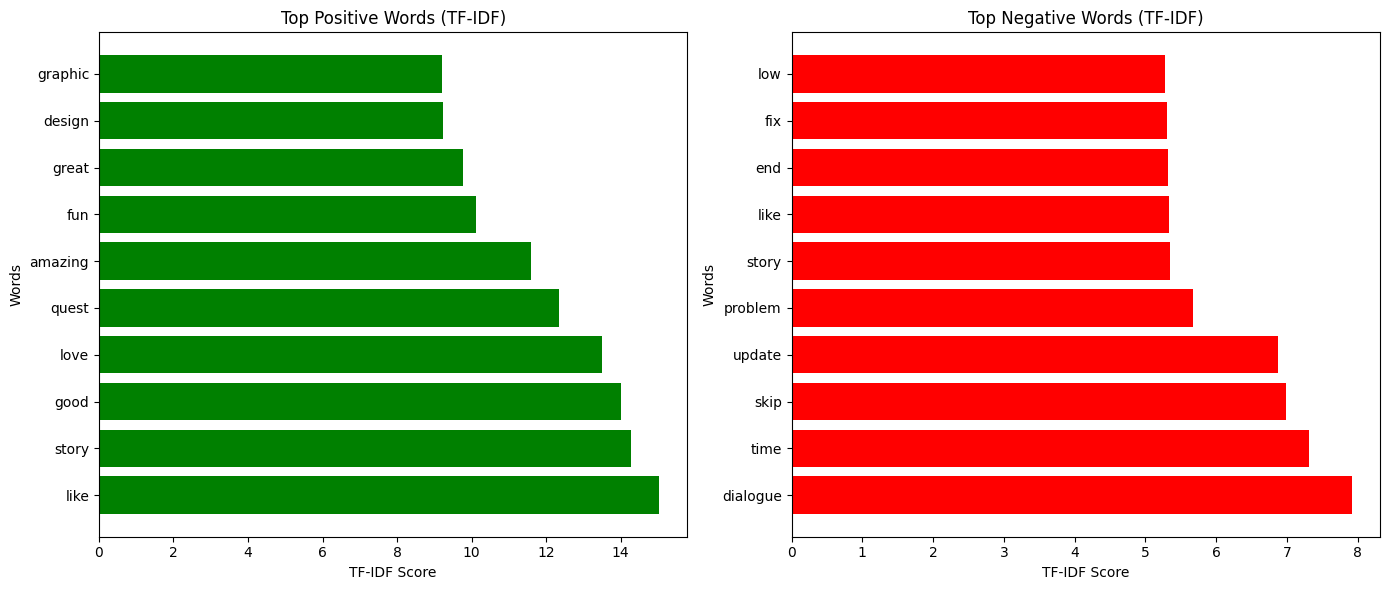

In [3]:
# Set up the figure and axis for plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top positive words
ax[0].barh(positive_top_words.index, positive_top_words.values, color='green')
ax[0].set_title('Top Positive Words (TF-IDF)')
ax[0].set_xlabel('TF-IDF Score')
ax[0].set_ylabel('Words')

# Plot the top negative words
ax[1].barh(negative_top_words.index, negative_top_words.values, color='red')
ax[1].set_title('Top Negative Words (TF-IDF)')
ax[1].set_xlabel('TF-IDF Score')
ax[1].set_ylabel('Words')

# Display the plots
plt.tight_layout()
plt.show()

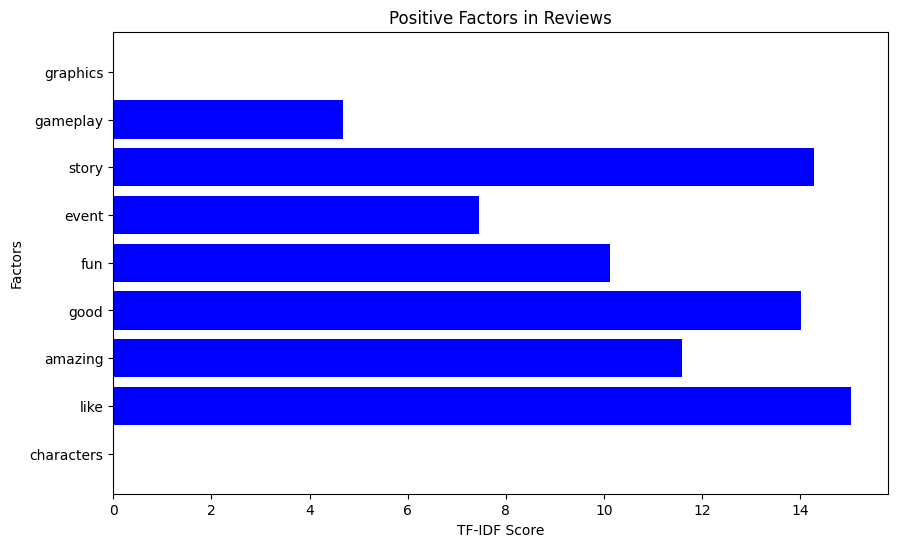

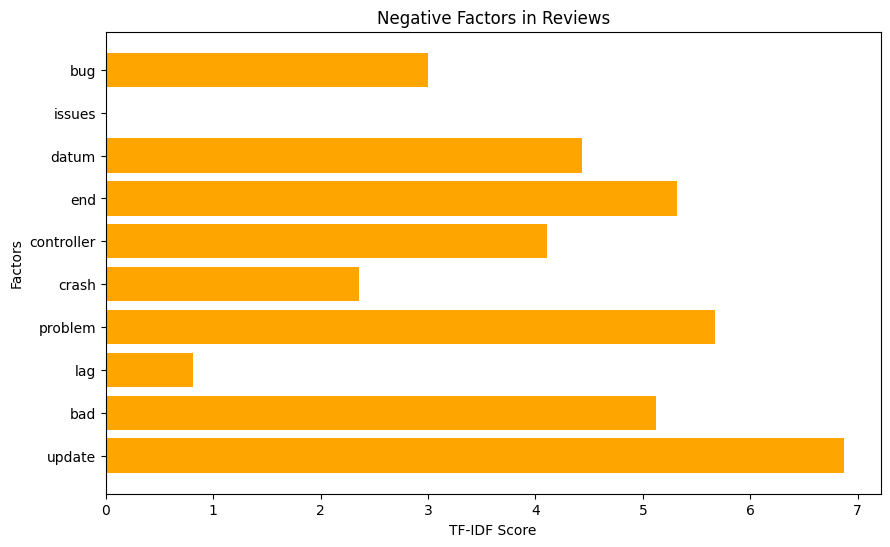

In [4]:
# Define positive and negative factors of interest
positive_factors = ['graphics', 'gameplay', 'story', 'event', 'fun', 'good', 'amazing', 'like', 'characters']
negative_factors = ['bug', 'issues', 'datum', 'end', 'controller', 'crash', 'problem', 'lag', 'bad', 'update']

# Extract the relevant TF-IDF scores for these factors
positive_factors_scores = {factor: positive_tfidf_scores.get(factor, 0) for factor in positive_factors}
negative_factors_scores = {factor: negative_tfidf_scores.get(factor, 0) for factor in negative_factors}

# Create DataFrames for visualization of these factors
positive_factors_df = pd.DataFrame(list(positive_factors_scores.items()), columns=['Factor', 'TF-IDF Score'])
negative_factors_df = pd.DataFrame(list(negative_factors_scores.items()), columns=['Factor', 'TF-IDF Score'])

# Visualize the Positive Factors
plt.figure(figsize=(10, 6))
plt.barh(positive_factors_df['Factor'], positive_factors_df['TF-IDF Score'], color='blue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Factors')
plt.title('Positive Factors in Reviews')
plt.gca().invert_yaxis()
plt.show()

# Visualize the Negative Factors
plt.figure(figsize=(10, 6))
plt.barh(negative_factors_df['Factor'], negative_factors_df['TF-IDF Score'], color='orange')
plt.xlabel('TF-IDF Score')
plt.ylabel('Factors')
plt.title('Negative Factors in Reviews')
plt.gca().invert_yaxis()
plt.show()